<a href="https://colab.research.google.com/github/jeanhrsouza/data-science-primeiros-passos/blob/main/Introducao_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science: Primeiros passos

## 01. Data Science: dados e visualizações

### Analisando as notas em geral

> Conhecendo nossos dados e o Pandas

In [14]:
import pandas as pd

notas = pd.read_csv('ratings.csv')

#mostrar os 5 primeiros elementos
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [15]:
#Verificar os formatos da tabela
notas.shape

(85271, 4)

In [16]:
#trocando os nomes das colunas
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [17]:
#Verificando todos os valores de nota
#(Serie)
notas['nota']

0        4.0
1        4.0
2        4.0
3        5.0
4        5.0
        ... 
85266    3.0
85267    5.0
85268    5.0
85269    5.0
85270    NaN
Name: nota, Length: 85271, dtype: float64

In [18]:
#Verificando todos os valores únicos de nota
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5, nan])

Note que a Serie <font color="green">nota</font> vai de 1 - 5

In [19]:
#Contando os valores de nota
#Perceba que é retornado do que mais aparece para a menor opção
notas['nota'].value_counts()

4.0    23131
3.0    16772
5.0    11506
3.5    11037
4.5     7407
2.0     6430
2.5     4110
1.0     2354
1.5     1367
0.5     1156
Name: nota, dtype: int64

In [20]:
#Verificando a média
notas['nota'].mean()

3.5234959540283803

> Visualizando dados com histograma e boxplot

In [21]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

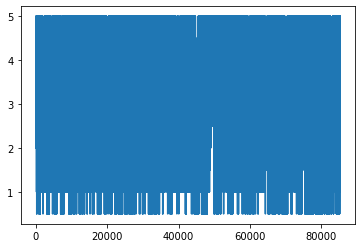

In [22]:
notas.nota.plot()

 O gráfico plot não foi eficiente para esse tipo de análise. Será necessário fazer plot com o tipo <font color="orange">histograma</font>

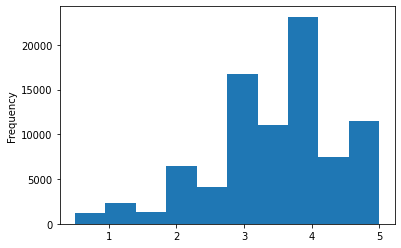

In [23]:
notas.nota.plot(kind='hist')

Identificando a mediana

In [24]:
print(f"Média: {notas['nota'].mean()}")
print(f"Mediana: {notas['nota'].median()}")

Média: 3.5234959540283803
Mediana: 3.5


In [25]:
#Verificar diversas medidas para entender os dados
notas.nota.describe()

count    85270.000000
mean         3.523496
std          1.040897
min          0.500000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


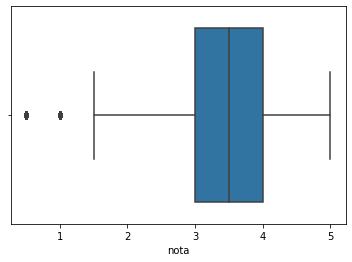

In [26]:
import seaborn as sns

sns.boxplot(notas.nota)

O boxplot é, resumidamente, a forma visual da função <font color="red">describe()</font>

## 02. Análise exploratória

### Olhando os filmes

In [30]:
filmes = pd.read_csv('movies.csv') # Lendo os filmes
filmes.columns = ["filmesId", "titulo", "generos"] #alterando nomes da coluna
filmes.head()

,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [32]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


### Analisando algumas notas específicas por filmes

In [36]:
#retornando a média somente das linhas com o filmeId 01
notas.query("filmeId==1").nota.mean()

3.9335106382978724

In [37]:
#retornando a média somente das linhas com o filmeId 02
notas.query("filmeId==2").nota.mean()

3.398936170212766

In [42]:
# Agrupando todas as notas pelo filmeId e verificando a média
medias_por_filme = notas.groupby("filmeId").mean()["nota"]
medias_por_filme.head()

filmeId
1    3.933511
2    3.398936
3    3.282609
4    2.500000
5    3.111111
Name: nota, dtype: float64

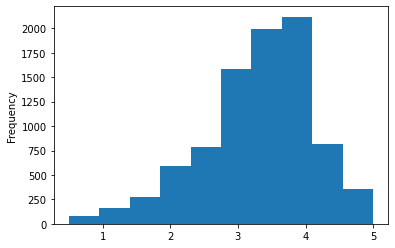

In [44]:
# Verificando as médias por filmes
medias_por_filme.plot(kind='hist')

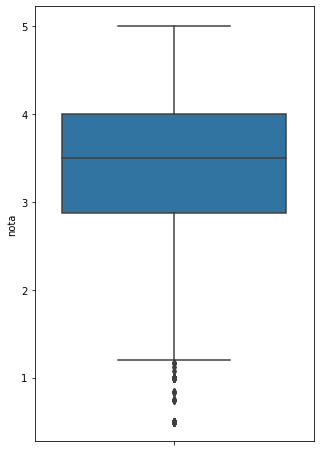

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [47]:
medias_por_filme.describe()

count    8757.000000
mean        3.308397
std         0.867765
min         0.500000
25%         2.875000
50%         3.500000
75%         4.000000
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


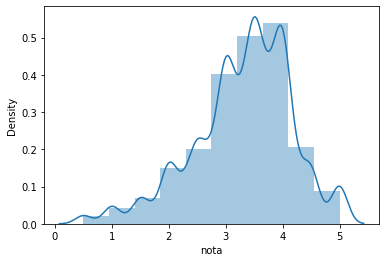

In [49]:
# Gráfico de distribuição
sns.distplot(medias_por_filme, bins = 10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

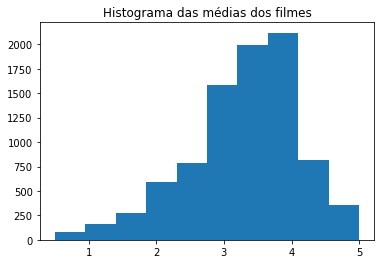

In [51]:

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")